In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Read each CSV file
train_df = pd.read_csv(os.path.join('../Data', "train_data.csv"))
undersampled_train_df = pd.read_csv(os.path.join('../Data', "undersampled_train_data.csv"))
oversampled_train_df = pd.read_csv(os.path.join('../Data', "oversampled_train_data.csv"))
extracted_features_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_train_data.csv"))
extracted_features_undersampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_undersampled_train_data.csv"))
extracted_features_oversampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_oversampled_train_data.csv"))
test_df = pd.read_csv(os.path.join('../Data', "test_data.csv"))

In [3]:
N_SPLITS = 3

# Apply on the original data

In [4]:
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

dtree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10, 20, 50]
}

grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

grid_dtree.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
dtree = grid_dtree.best_estimator_

print("Best Estimator: ", dtree)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Estimator:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10)


In [5]:
# results of grid search CV
cv_results = pd.DataFrame(grid_dtree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.031165,0.064735,0.015156,0.000611,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.893876,0.881660,0.885519,0.887018,0.005099,26,0.921743,0.925885,0.914491,0.920706,0.004709
1,3.896224,0.026125,0.014643,0.000274,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.893871,0.874059,0.885518,0.884482,0.008121,27,0.921743,0.925886,0.914491,0.920707,0.004709
2,3.827487,0.045044,0.013611,0.000416,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.893875,0.896905,0.923611,0.904797,0.013361,23,0.921714,0.925865,0.914449,0.920676,0.004718
3,3.850031,0.044327,0.014339,0.000558,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.901450,0.904493,0.931211,0.912384,0.013370,20,0.921708,0.925820,0.914417,0.920649,0.004715
4,3.789358,0.006744,0.013943,0.000200,5,20,20,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.901448,0.904508,0.931205,0.912387,0.013365,19,0.921708,0.925820,0.914417,0.920649,0.004715
5,3.884450,0.083519,0.015332,0.001807,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.901446,0.904492,0.923571,0.909836,0.009791,21,0.921697,0.925820,0.914417,0.920645,0.004714
6,3.961654,0.018818,0.014512,0.000260,5,50,10,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901295,0.926732,0.944464,0.924164,0.017717,10,0.925365,0.954716,0.942590,0.940891,0.012043
7,3.886461,0.027575,0.014415,0.000181,5,50,20,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901295,0.934351,0.944461,0.926702,0.018434,8,0.925365,0.954716,0.942590,0.940891,0.012043
8,3.914772,0.037728,0.014433,0.000121,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901305,0.934344,0.936855,0.924168,0.016199,9,0.925365,0.954716,0.942590,0.940891,0.012043
9,7.636356,0.109967,0.015153,0.000420,10,10,10,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.921006,0.918381,0.909839,0.916409,0.004768,17,0.958285,0.974582,0.958179,0.963682,0.007708


In [6]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_dtree.best_score_)
print(grid_dtree.best_estimator_)

Best roc_auc:- 0.9393230936930426
DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10)


In [7]:
# Best score with best parameters
best_score = grid_dtree.best_score_
best_params = grid_dtree.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9393230936930426 with parameters {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [8]:
dtree = DecisionTreeClassifier(**best_params)
original_best_tree_model = dtree.fit(X_train, y_train)
y_train_pred = original_best_tree_model.predict(X_train)

In [9]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227419     32]
 [    91    303]]


In [10]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.7690355329949239
Percision: 0.9044776119402985
F1-Score: 0.8312757201646092
Accuracy: 0.9994601593188351
Specificity: 0.999859310356956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.77      0.83       394

    accuracy                           1.00    227845
   macro avg       0.95      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845



In [11]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

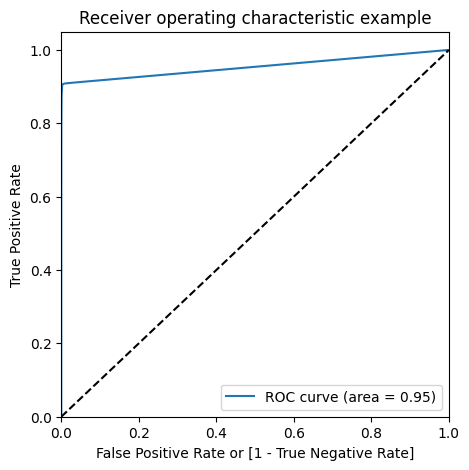

In [12]:
# Predicted probability
y_train_pred_proba = original_best_tree_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [13]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(original_best_tree_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9993
test_precision: 0.8756
test_recall: 0.7260
test_f1: 0.7930
test_roc_auc: 0.9342


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the original data

In [14]:
X_train = extracted_features_train_df.drop('Class', axis=1).values
y_train = extracted_features_train_df['Class'].values

dtree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10, 20, 50]
}

grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

grid_dtree.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
dtree = grid_dtree.best_estimator_

print("Best Estimator: ", dtree)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Estimator:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=10)


In [15]:
# results of grid search CV
cv_results = pd.DataFrame(grid_dtree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.116453,0.001511,0.011509,0.000110,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.928832,0.925583,0.944948,0.933121,0.008467,13,0.942924,0.944635,0.941059,0.942873,0.001460
1,1.112125,0.001791,0.011536,0.000043,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.928832,0.925583,0.944946,0.933121,0.008467,14,0.942924,0.944635,0.941059,0.942873,0.001460
2,1.115925,0.001053,0.011471,0.000252,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.928828,0.925580,0.944916,0.933108,0.008454,15,0.942918,0.944631,0.941040,0.942863,0.001467
3,1.127073,0.018451,0.011820,0.000637,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.928828,0.933102,0.944904,0.935612,0.006799,11,0.942909,0.944593,0.941018,0.942840,0.001460
4,1.104482,0.000637,0.011200,0.000091,5,20,20,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.928828,0.933102,0.944904,0.935612,0.006799,11,0.942909,0.944593,0.941018,0.942840,0.001460
5,1.103435,0.001060,0.011533,0.000331,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.928829,0.933102,0.944908,0.935613,0.006800,10,0.942909,0.944593,0.941018,0.942840,0.001460
6,1.101227,0.001861,0.011147,0.000219,5,50,10,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.928654,0.934958,0.944817,0.936143,0.006652,7,0.944682,0.954593,0.942793,0.947356,0.005175
7,1.102794,0.001505,0.011203,0.000270,5,50,20,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.928654,0.934957,0.944813,0.936141,0.006650,8,0.944682,0.954593,0.942793,0.947356,0.005175
8,1.102332,0.000293,0.011134,0.000166,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.928654,0.934953,0.944813,0.936140,0.006650,9,0.944682,0.954593,0.942793,0.947356,0.005175
9,2.182045,0.008459,0.012636,0.000431,10,10,10,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.916188,0.909920,0.933868,0.919992,0.010140,21,0.959874,0.989111,0.966946,0.971977,0.012455


In [16]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_dtree.best_score_)
print(grid_dtree.best_estimator_)

Best roc_auc:- 0.9424870228327142
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=10)


In [17]:
# Best score with best parameters
best_score = grid_dtree.best_score_
best_params = grid_dtree.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9424870228327142 with parameters {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 10}


In [18]:
dtree = DecisionTreeClassifier(**best_params)
original_best_tree_model_v2 = dtree.fit(X_train, y_train)
y_train_pred = original_best_tree_model_v2.predict(X_train)

In [19]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[221496     46]
 [    71    323]]


In [20]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.8197969543147208
Percision: 0.8753387533875339
F1-Score: 0.8466579292267365
Accuracy: 0.9994728209934396
Specificity: 0.9997923644275126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221542
           1       0.88      0.82      0.85       394

    accuracy                           1.00    221936
   macro avg       0.94      0.91      0.92    221936
weighted avg       1.00      1.00      1.00    221936



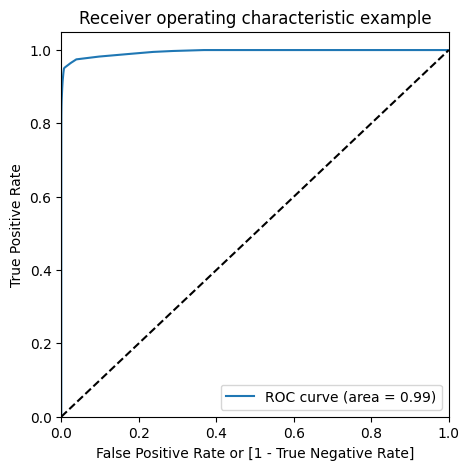

In [21]:
# Predicted probability
y_train_pred_proba = original_best_tree_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [22]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(original_best_tree_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9993
test_precision: 0.8086
test_recall: 0.7741
test_f1: 0.7895
test_roc_auc: 0.9397


# Apply on the under-sampled data

In [23]:
X_train = undersampled_train_df.drop('Class', axis=1).values
y_train = undersampled_train_df['Class'].values

dtree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10, 20, 50]
}

grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

grid_dtree.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
dtree = grid_dtree.best_estimator_

print("Best Estimator: ", dtree)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Estimator:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=20)


In [24]:
# results of grid search CV
cv_results = pd.DataFrame(grid_dtree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005579,0.000135,0.001264,0.000065,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.961485,0.961977,0.958831,0.960764,0.001382,23,0.993136,0.987468,0.994629,0.991744,0.003084
1,0.005514,0.000229,0.001215,0.000055,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.961485,0.943702,0.965445,0.956877,0.009455,27,0.993136,0.986278,0.994586,0.991333,0.003623
2,0.005494,0.000179,0.001233,0.000101,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.962295,0.958565,0.962881,0.961247,0.001912,21,0.991488,0.985234,0.993357,0.990026,0.003474
3,0.005068,0.000285,0.001253,0.000083,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.963914,0.962671,0.973195,0.966593,0.004696,11,0.989413,0.985408,0.989200,0.988007,0.001840
4,0.005072,0.000250,0.001161,0.000019,5,20,20,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.962121,0.959750,0.965037,0.962303,0.002162,20,0.989413,0.985408,0.989200,0.988007,0.001840
5,0.005114,0.000272,0.001167,0.000008,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.963509,0.962671,0.971593,0.965924,0.004023,14,0.989413,0.985408,0.988477,0.987766,0.001711
6,0.004073,0.000219,0.001165,0.000007,5,50,10,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.964781,0.969986,0.977012,0.970593,0.005011,3,0.977760,0.979733,0.974411,0.977301,0.002197
7,0.004080,0.000223,0.001180,0.000009,5,50,20,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.964492,0.970275,0.974040,0.969602,0.003927,6,0.977760,0.979733,0.974411,0.977301,0.002197
8,0.004061,0.000197,0.001598,0.000463,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.964839,0.970160,0.976895,0.970631,0.004933,2,0.977760,0.979733,0.974411,0.977301,0.002197
9,0.006024,0.000473,0.001406,0.000135,10,10,10,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.960965,0.959230,0.962386,0.960860,0.001291,22,0.993542,0.994405,0.994586,0.994178,0.000456


In [25]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_dtree.best_score_)
print(grid_dtree.best_estimator_)

Best roc_auc:- 0.9707289372955709
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=20)


In [26]:
# Best score with best parameters
best_score = grid_dtree.best_score_
best_params = grid_dtree.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9707289372955709 with parameters {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 20}


In [27]:
dtree = DecisionTreeClassifier(**best_params)
undersampled_best_tree_model = dtree.fit(X_train, y_train)
y_train_pred = undersampled_best_tree_model.predict(X_train)

In [28]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[370  24]
 [ 20 374]]


In [29]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.949238578680203
Percision: 0.9396984924623115
F1-Score: 0.9444444444444445
Accuracy: 0.9441624365482234
Specificity: 0.9390862944162437
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       394
           1       0.94      0.95      0.94       394

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788



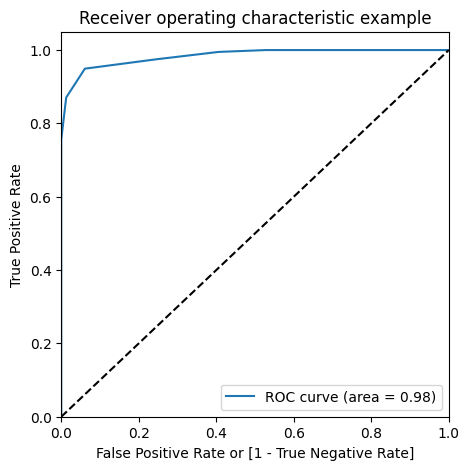

In [30]:
# Predicted probability
y_train_pred_proba = undersampled_best_tree_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [31]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(undersampled_best_tree_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9264
test_precision: 0.9828
test_recall: 0.8681
test_f1: 0.9218
test_roc_auc: 0.9685


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the undersampled data

In [32]:
X_train = extracted_features_undersampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_undersampled_train_df['Class'].values

dtree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10, 20, 50]
}

grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

grid_dtree.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
dtree = grid_dtree.best_estimator_

print("Best Estimator: ", dtree)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Estimator:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=10)


In [33]:
# results of grid search CV
cv_results = pd.DataFrame(grid_dtree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002522,0.000339,0.001629,0.000169,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.954664,0.944746,0.967826,0.955745,0.009453,23,0.989288,0.991378,0.992685,0.991117,0.001399
1,0.002734,0.000133,0.002035,0.000035,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.954664,0.944835,0.967826,0.955775,0.009419,22,0.989288,0.991378,0.992685,0.991117,0.001399
2,0.002370,0.000306,0.001757,0.000349,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.956676,0.951902,0.967110,0.958563,0.006350,20,0.987357,0.985563,0.991601,0.988174,0.002532
3,0.001938,0.000174,0.001410,0.000188,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.962121,0.946565,0.977606,0.962097,0.012673,17,0.989131,0.987086,0.987910,0.988042,0.000840
4,0.001792,0.000084,0.001149,0.000003,5,20,20,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.962062,0.946565,0.976682,0.961770,0.012297,18,0.989131,0.987086,0.987910,0.988042,0.000840
5,0.001801,0.000045,0.001202,0.000071,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.962062,0.951097,0.980618,0.964592,0.012184,11,0.989131,0.986343,0.987405,0.987626,0.001149
6,0.001467,0.000103,0.001237,0.000088,5,50,10,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.961470,0.964098,0.976831,0.967466,0.006708,9,0.976846,0.979199,0.973547,0.976531,0.002318
7,0.001542,0.000152,0.001178,0.000046,5,50,20,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.961470,0.965142,0.976473,0.967695,0.006385,8,0.976846,0.979199,0.973547,0.976531,0.002318
8,0.001491,0.000043,0.001178,0.000032,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.964903,0.962071,0.976831,0.967935,0.006396,6,0.976846,0.979199,0.973547,0.976531,0.002318
9,0.002091,0.000134,0.001189,0.000034,10,10,10,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.955019,0.944090,0.953364,0.950824,0.004810,25,0.992486,0.993079,0.992952,0.992839,0.000255


In [34]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_dtree.best_score_)
print(grid_dtree.best_estimator_)

Best roc_auc:- 0.9691183663929369
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=10)


In [35]:
# Best score with best parameters
best_score = grid_dtree.best_score_
best_params = grid_dtree.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9691183663929369 with parameters {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 10}


In [36]:
dtree = DecisionTreeClassifier(**best_params)
undersampled_best_tree_model_v2 = dtree.fit(X_train, y_train)
y_train_pred = undersampled_best_tree_model_v2.predict(X_train)

In [37]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[360  24]
 [ 20 374]]


In [38]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.949238578680203
Percision: 0.9396984924623115
F1-Score: 0.9444444444444445
Accuracy: 0.9434447300771208
Specificity: 0.9375
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       384
           1       0.94      0.95      0.94       394

    accuracy                           0.94       778
   macro avg       0.94      0.94      0.94       778
weighted avg       0.94      0.94      0.94       778



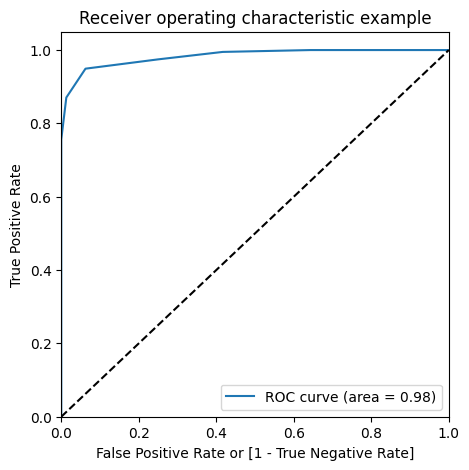

In [39]:
# Predicted probability
y_train_pred_proba = undersampled_best_tree_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [40]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(undersampled_best_tree_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9254
test_precision: 0.9828
test_recall: 0.8680
test_f1: 0.9218
test_roc_auc: 0.9690


# Apply on the over-sampled data

In [41]:
X_train = oversampled_train_df.drop('Class', axis=1).values
y_train = oversampled_train_df['Class'].values

dtree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10, 20, 50]
}

grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

grid_dtree.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
dtree = grid_dtree.best_estimator_

print("Best Estimator: ", dtree)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Estimator:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50)


In [42]:
# results of grid search CV
cv_results = pd.DataFrame(grid_dtree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.316842,0.040698,0.029292,0.000501,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.988867,0.987829,0.987854,0.988184,0.000484,23,0.988742,0.988692,0.988310,0.988581,0.000193
1,7.666360,0.106820,0.029626,0.000008,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.988867,0.987829,0.987854,0.988183,0.000484,25,0.988742,0.988692,0.988310,0.988581,0.000193
2,7.734196,0.037825,0.030816,0.000406,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.988867,0.987829,0.987854,0.988184,0.000484,23,0.988742,0.988692,0.988310,0.988581,0.000193
3,7.715131,0.073369,0.029872,0.000541,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.988858,0.987815,0.987833,0.988168,0.000487,27,0.988734,0.988679,0.988296,0.988570,0.000195
4,7.939677,0.092641,0.030092,0.000446,5,20,20,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.988867,0.987816,0.987868,0.988184,0.000484,22,0.988734,0.988679,0.988296,0.988570,0.000195
5,8.053351,0.112044,0.030854,0.000930,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.988867,0.987816,0.987837,0.988174,0.000491,26,0.988734,0.988679,0.988296,0.988570,0.000195
6,7.539160,0.280346,0.029935,0.001495,5,50,10,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989219,0.987796,0.987923,0.988313,0.000643,19,0.989009,0.988659,0.988271,0.988646,0.000302
7,7.422008,0.080051,0.029378,0.000204,5,50,20,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989215,0.987796,0.987924,0.988312,0.000641,21,0.989009,0.988659,0.988271,0.988646,0.000302
8,7.470896,0.044498,0.030384,0.000847,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989215,0.987798,0.987923,0.988312,0.000640,20,0.989009,0.988659,0.988271,0.988646,0.000302
9,13.882282,0.076219,0.031757,0.001314,10,10,10,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.998278,0.997606,0.998123,0.998003,0.000287,17,0.998836,0.998785,0.998896,0.998839,0.000045


In [43]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_dtree.best_score_)
print(grid_dtree.best_estimator_)

Best roc_auc:- 0.998956453194146
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50)


In [44]:
# Best score with best parameters
best_score = grid_dtree.best_score_
best_params = grid_dtree.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.998956453194146 with parameters {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [45]:
dtree = DecisionTreeClassifier(**best_params)
oversampled_best_tree_model = dtree.fit(X_train, y_train)
y_train_pred = oversampled_best_tree_model.predict(X_train)

In [46]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[225122   2329]
 [  1093 226358]]


In [47]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9951945693797785
Percision: 0.9898157743990694
F1-Score: 0.9924978844121735
Accuracy: 0.9924775006484913
Specificity: 0.9897604319172042
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



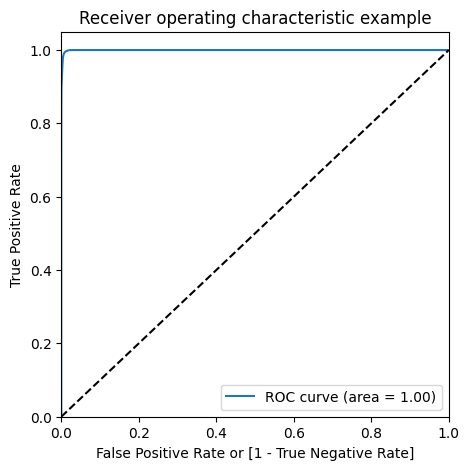

In [48]:
# Predicted probability
y_train_pred_proba = oversampled_best_tree_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [49]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(oversampled_best_tree_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9888
test_precision: 0.9866
test_recall: 0.9910
test_f1: 0.9888
test_roc_auc: 0.9989


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the oversampled data

In [50]:
X_train = extracted_features_oversampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_oversampled_train_df['Class'].values

dtree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10, 20, 50]
}

grid_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

grid_dtree.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
dtree = grid_dtree.best_estimator_

print("Best Estimator: ", dtree)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Estimator:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=20)


In [51]:
# results of grid search CV
cv_results = pd.DataFrame(grid_dtree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.233673,0.001770,0.026378,0.000197,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.987984,0.987493,0.987281,0.987586,0.000294,25,0.987847,0.988318,0.987859,0.988008,0.000219
1,2.241000,0.037937,0.025875,0.000422,5,10,20,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.987981,0.987493,0.987281,0.987585,0.000293,27,0.987847,0.988318,0.987859,0.988008,0.000219
2,2.221627,0.014588,0.025719,0.000222,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.987984,0.987493,0.987281,0.987586,0.000294,25,0.987847,0.988318,0.987859,0.988008,0.000219
3,2.243640,0.007679,0.026183,0.000181,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.987981,0.987623,0.987273,0.987626,0.000289,23,0.987846,0.988450,0.987852,0.988049,0.000284
4,2.234569,0.007360,0.026091,0.000332,5,20,20,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.987981,0.987627,0.987279,0.987629,0.000287,22,0.987846,0.988450,0.987852,0.988049,0.000284
5,2.229318,0.004112,0.025735,0.000280,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.987981,0.987613,0.987279,0.987625,0.000287,24,0.987846,0.988440,0.987852,0.988046,0.000279
6,2.233207,0.009920,0.025878,0.000268,5,50,10,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987969,0.987579,0.987511,0.987687,0.000202,19,0.987841,0.988416,0.987934,0.988064,0.000252
7,2.225741,0.005260,0.025826,0.000119,5,50,20,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987969,0.987579,0.987511,0.987687,0.000202,19,0.987841,0.988416,0.987934,0.988064,0.000252
8,2.225235,0.001898,0.025961,0.000063,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987969,0.987579,0.987511,0.987687,0.000202,21,0.987841,0.988416,0.987934,0.988064,0.000252
9,3.984928,0.205115,0.027213,0.000342,10,10,10,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.998071,0.998008,0.997885,0.997988,0.000077,13,0.998611,0.998655,0.998559,0.998608,0.000039


In [52]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_dtree.best_score_)
print(grid_dtree.best_estimator_)

Best roc_auc:- 0.9987075036766718
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=20)


In [53]:
# Best score with best parameters
best_score = grid_dtree.best_score_
best_params = grid_dtree.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9987075036766718 with parameters {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 20}


In [ ]:
dtree = DecisionTreeClassifier(**best_params)
oversampled_best_tree_model_v2 = dtree.fit(X_train, y_train)
y_train_pred = oversampled_best_tree_model_v2.predict(X_train)

In [55]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[218741   2801]
 [  1900 225551]]


In [56]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9916465524442627
Percision: 0.9877338494955157
F1-Score: 0.9896863337889396
Accuracy: 0.989529903584243
Specificity: 0.9873567991622356
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    221542
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    448993
   macro avg       0.99      0.99      0.99    448993
weighted avg       0.99      0.99      0.99    448993



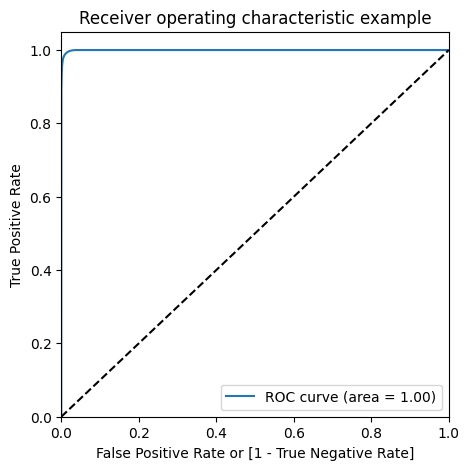

In [57]:
# Predicted probability
y_train_pred_proba = oversampled_best_tree_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [58]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(oversampled_best_tree_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9852
test_precision: 0.9843
test_recall: 0.9864
test_f1: 0.9854
test_roc_auc: 0.9987
